# A detailed look at some of the SuSiE fits

In comparison with CAVIAR follow-ups, as shown in [this notebook](20180704_MolecularQTL_Workflow.html).

Here is a "bad" example, with prior variance set to 0.1.

> /home/gaow/Documents/GIT/LargeFiles/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/CAVIAR_follow_up/chr1_111998871_112002079_clu_16495.CAVIAR.png (211.2 KiB):

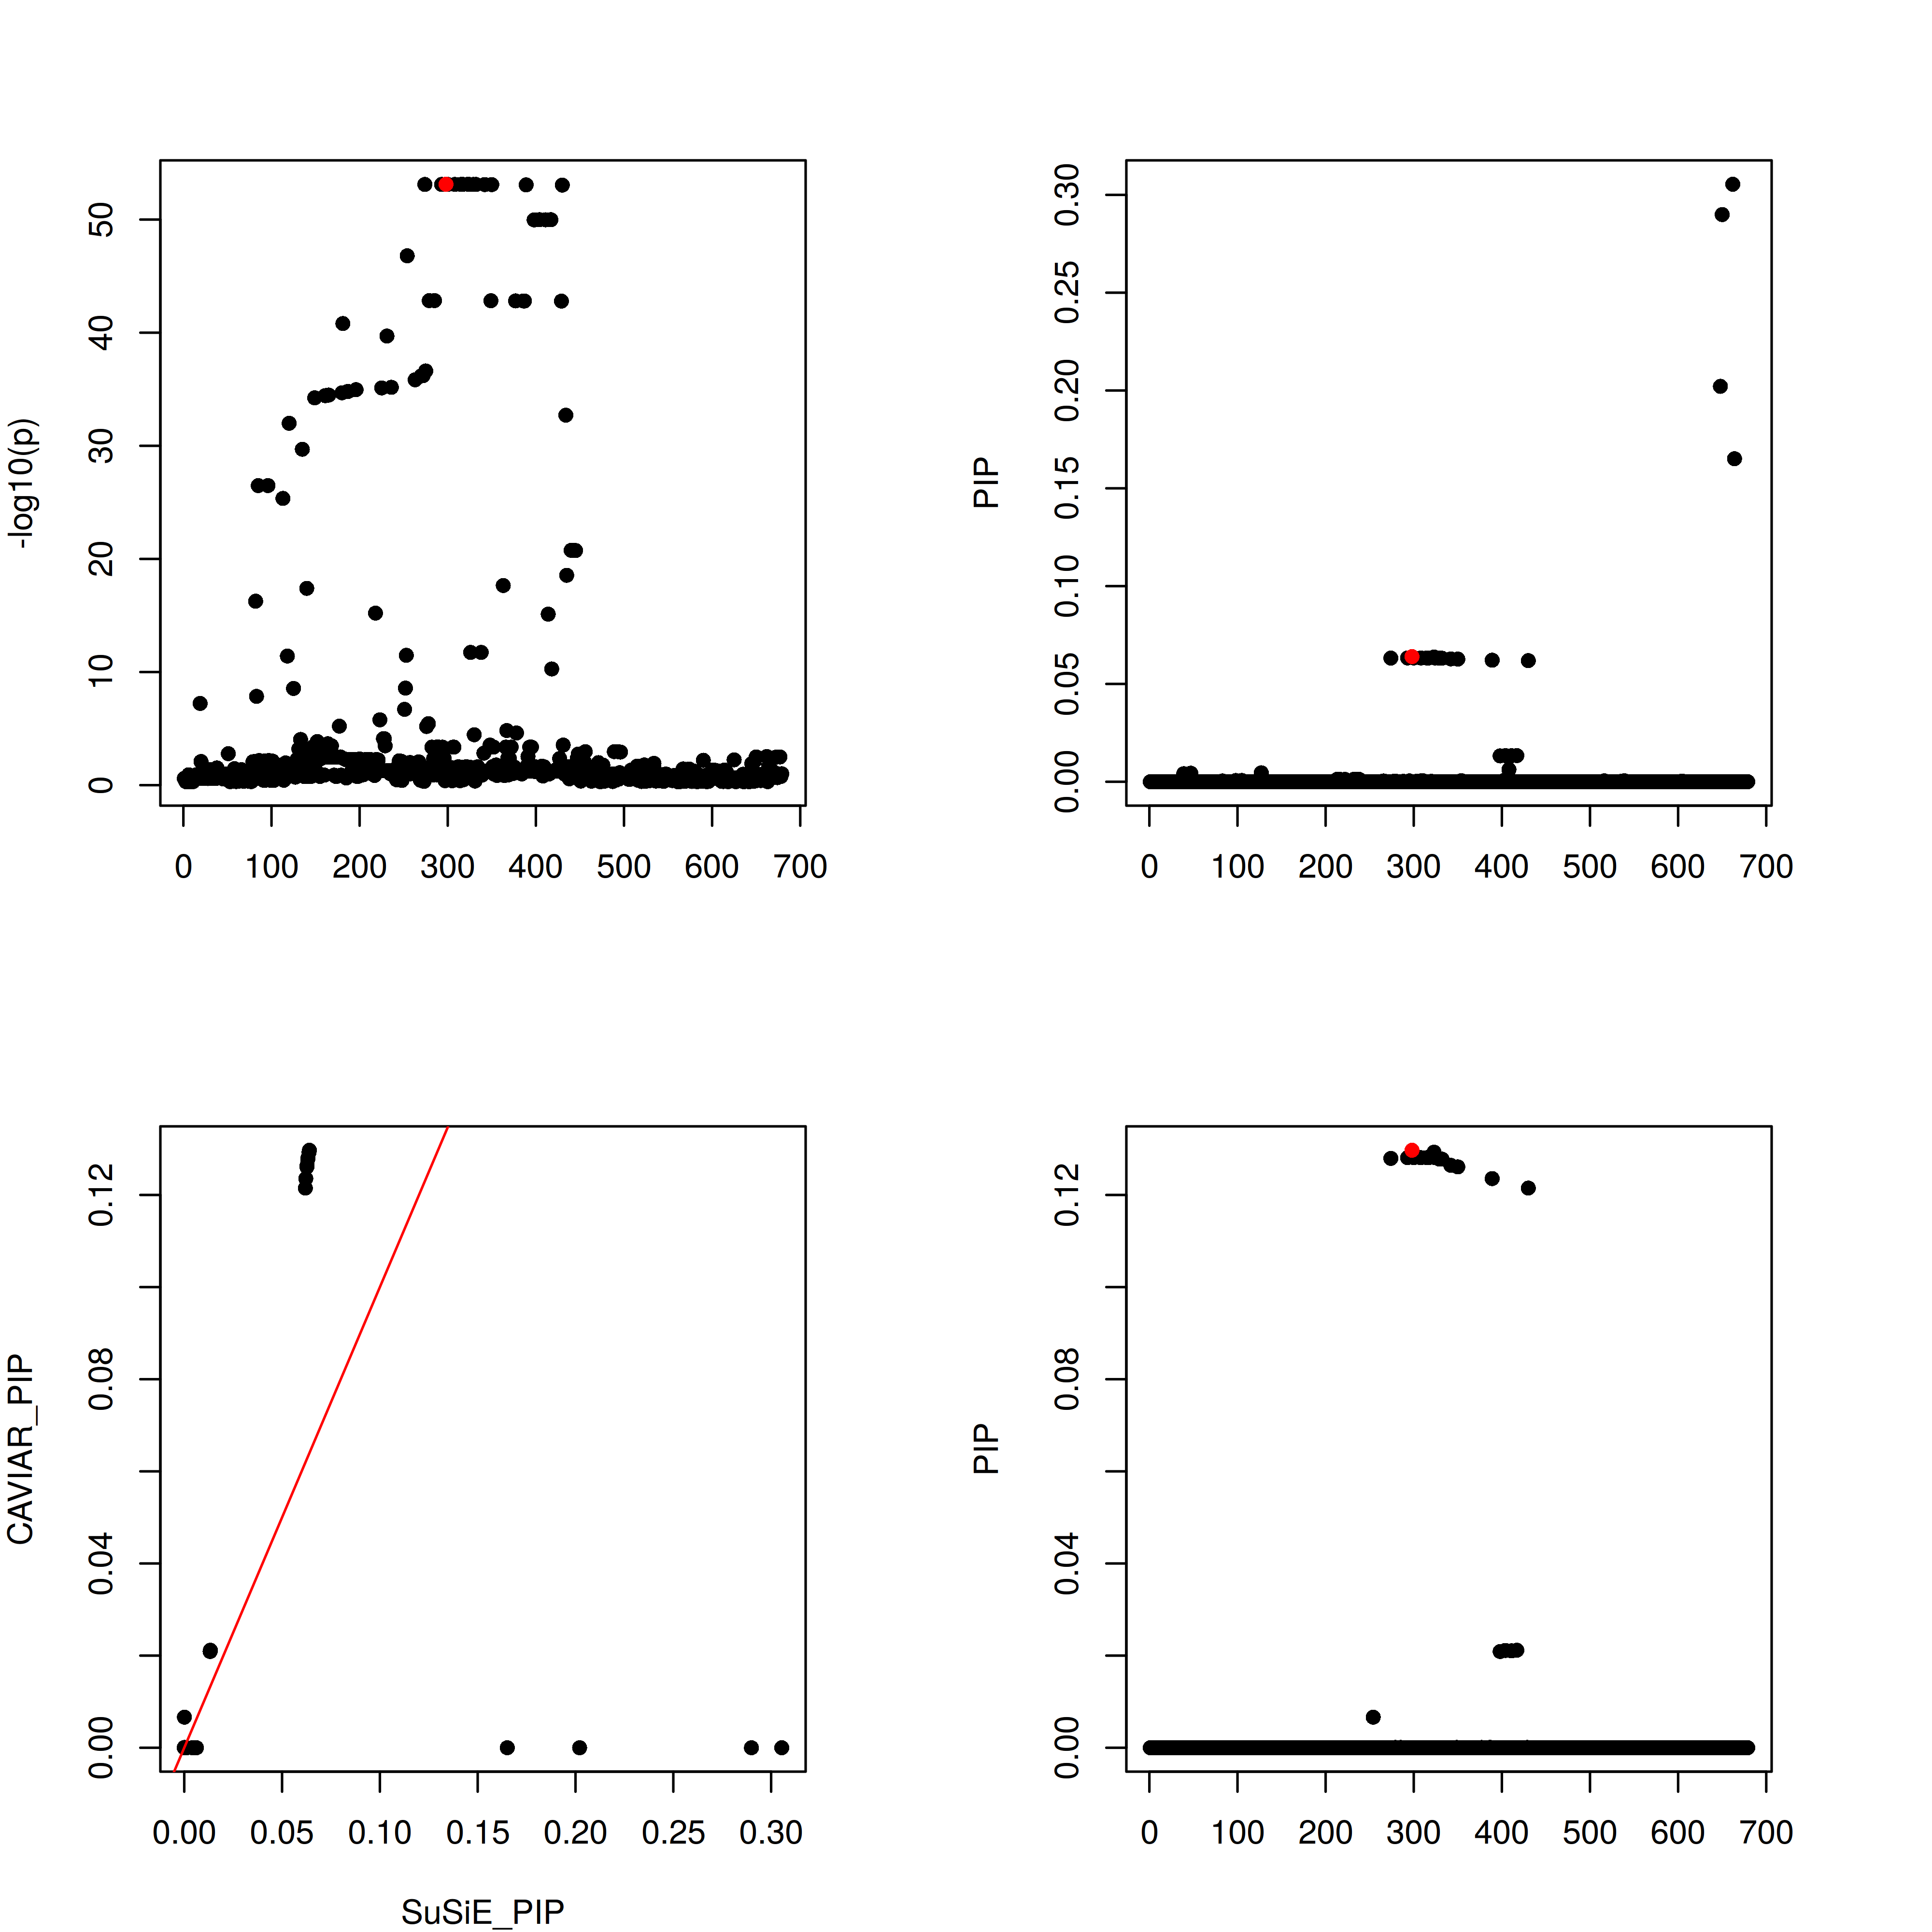

In [1]:
%preview /home/gaow/Documents/GIT/LargeFiles/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/CAVIAR_follow_up/chr1_111998871_112002079_clu_16495.CAVIAR.png

We trace back to its input data-set and see what is going on.

In [2]:
ls /home/gaow/Documents/GIT/LargeFiles/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_*/chr1_111998871_112002079*

/home/gaow/Documents/GIT/LargeFiles/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr1_111998871_112002079_clu_16495.log
/home/gaow/Documents/GIT/LargeFiles/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr1_111998871_112002079_clu_16495.png
/home/gaow/Documents/GIT/LargeFiles/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr1_111998871_112002079_clu_16495.rds


In [12]:
fn = "/home/gaow/Documents/GIT/LargeFiles/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr1_111998871_112002079_clu_16495.rds"
susie = readRDS(fn)
dat = readRDS(susie$input)[[susie$idx]]
saveRDS(dat, "~/chr1_111998871_112002079_clu_16495_data.rds")

In [2]:
x = susieR:::safe_colScale(dat$X,center=TRUE, scale = TRUE)
y = dat$y - mean(dat$y)
reg = susieR:::univariate_regression(x,y)
z_score = reg$betahat/reg$sebetahat
top_idx = which.max(abs(z_score))
pve = var(x[,top_idx] * reg$betahat[top_idx]) / var(y)

In [3]:
pve

[1] 0.7362838

In [4]:
dat$pve

[1] 0.7362838

Okay, estimated PVE here is 0.7, much greater than our set value 0.1. Let's rerun susie with this new PVE:

## Set prior variance to PVE estimate

In [5]:
library(susieR)
fitted = susie(dat$X, dat$y,
               estimate_residual_variance=TRUE, 
               prior_variance=dat$pve, 
               intercept=FALSE,
               tol=1e-3)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)

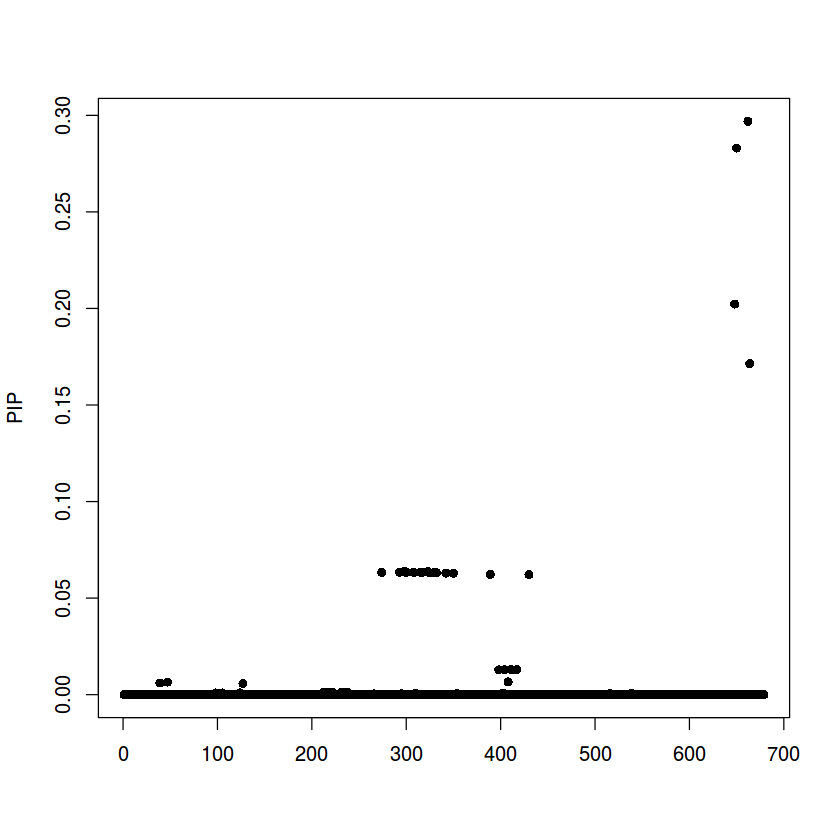

In [6]:
susie_pplot(pip, dtype='PIP')

It did not change the result.

## Estimate prior variance

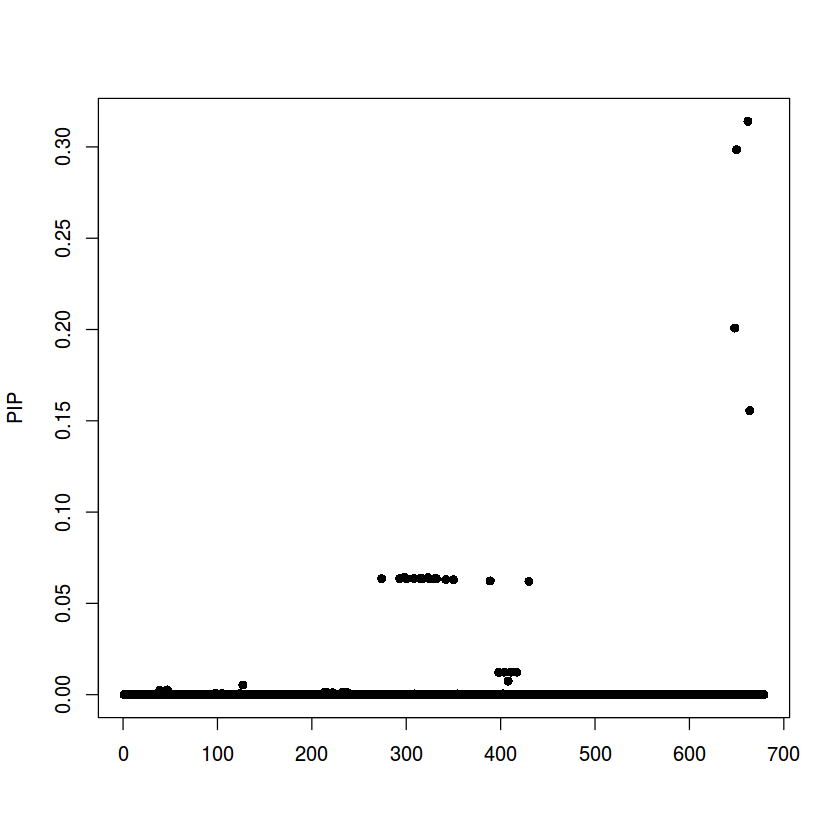

In [7]:
fitted = susie(dat$X, dat$y,
               estimate_residual_variance=TRUE, 
               estimate_prior_variance=TRUE,
               intercept=FALSE,
               tol=1e-3)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)
susie_pplot(pip, dtype='PIP')

In [8]:
fitted$sa2

[1] 2.760201 0.054359 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 [9] 0.000000 0.000000

### Estimate with `standardize=F`

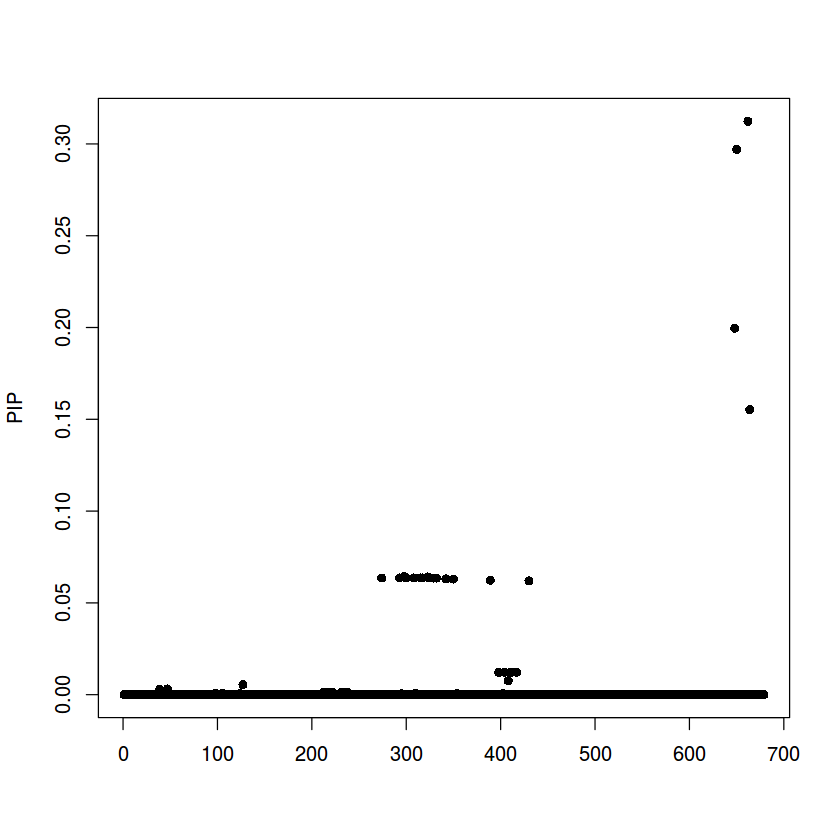

In [9]:
fitted = susie(dat$X, dat$y,
               estimate_residual_variance=TRUE, 
               estimate_prior_variance=TRUE,
               intercept=FALSE,
               standardize=FALSE,
               tol=1e-3)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)
susie_pplot(pip, dtype='PIP')

In [10]:
fitted$sa2

[1] 11.5040018  0.3403644  0.0000000  0.0000000  0.0000000  0.0000000
 [7]  0.0000000  0.0000000  0.0000000  0.0000000